# Underfitting vs. Overfitting

Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [1]:
using ScikitLearn, PyPlot
using ScikitLearn.CrossValidation: cross_val_score
using ScikitLearn.Pipelines: Pipeline

@sk_import preprocessing: PolynomialFeatures
@sk_import linear_model: LinearRegression

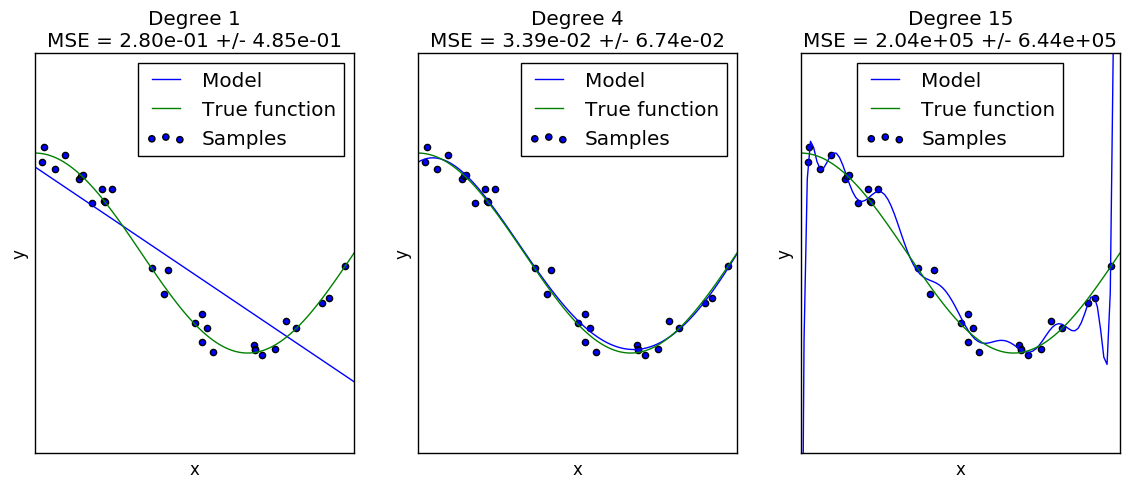

In [2]:
srand(2)

n_samples = 30
degrees = [1, 4, 15]

true_fun(X) = cos(1.5 * pi * X)
X = sort(rand(n_samples))
y = true_fun(X) + randn(n_samples) * 0.1

figure(figsize=(14, 5))
for (i, degree) in enumerate(degrees)
    ax = subplot(1, length(degrees), i)
    setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=false)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    fit!(pipeline, X'', y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X'', y, scoring="mean_squared_error", cv=10)

    X_test = linspace(0, 1, 100)
    plot(X_test, predict(pipeline, X_test''), label="Model")
    plot(X_test, true_fun(X_test), label="True function")
    scatter(X, y, label="Samples")
    xlabel("x")
    ylabel("y")
    xlim((0, 1))
    ylim((-2, 2))
    legend(loc="best")
    title(@sprintf("Degree %d\nMSE = %.2e +/- %.2e", degree, -mean(scores), std(scores)))
end